# 1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation.

### Importing the Libraries 

In [383]:
import warnings
warnings.filterwarnings('ignore')

In [384]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt 
%matplotlib inline 

import seaborn as sns
sns.set(color_codes = True)

from sklearn.model_selection import train_test_split


### Read and display the Dataset

In [385]:
data = pd.read_csv('Bank_Personal_Loan_Modelling.csv') # read the data file

print('Shape of the data:',data.shape,'\n') # Displays the dimension of the dataframe

display(data.head())

print('\n\nThe number of rows in the file are ', data.shape[0])

Shape of the data: (5000, 14) 



,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1




The number of rows in the file are  5000


### Check datatype

In [386]:
data.info() # Info about the dataframe with index and column data types, non-null values and mempry usge. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [387]:
d1 = data.drop(data.columns[[0,4]], axis = 1) # removing column ID & Zip code
display(d1.head(),d1.describe().T.round(2))

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.34,11.46,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.10,11.47,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.77,46.03,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.40,1.15,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.94,1.75,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.88,0.84,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.50,101.71,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.10,0.29,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.10,0.31,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.06,0.24,0.0,0.0,0.0,0.0,1.0


### Note: 
#### 1. Experience is having a negative value which is not possible as it can a minimum value of zero.
#### 2. There's a lot of difference between the maximum and the 75% quartile in: income, average credit card spending per month, mortgage.

In [388]:
display(d1.isnull().sum()) # to check for any null values in the dataframe.

if(d1.isnull().any().any()):
    print('There are null values in the dataset')
print('There are no null values in the dataset')

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

There are no null values in the dataset


### Correcting the incorrect imputation

In [389]:
exp = d1[d1['Experience'] < 0]
print('Total number of rows with less than zero experience:', exp.shape[0],'\n')
display(exp.head())
print('\nMaximum age with negative value is:',max(exp['Age']),'\nMinimum age with negative value is:',min(exp['Age']))

Total number of rows with less than zero experience: 52 



,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,25,-1,113,4,2.30,3,0,0,0,0,0,1
226,24,-1,39,2,1.70,2,0,0,0,0,0,0
315,24,-2,51,3,0.30,3,0,0,0,0,1,0
451,28,-2,48,2,1.75,3,89,0,0,0,1,0
524,24,-1,75,4,0.20,1,0,0,0,0,1,0



Maximum age with negative value is: 29 
Minimum age with negative value is: 23


### All the values of Age for these negative experience is within 23-29, thus changing the experience values to '0'.

In [390]:
d1[d1['Experience'] < 0] = 0 # Changing the negative experience to zero.

num = d1[d1['Experience'] < 0] 

print('The number of rows with negative experience are', num.shape[0])

#display(d1.describe().T.round(2))

The number of rows with negative experience are 0


# 2. EDA

### Number of unique in each column

In [391]:
print(data.nunique()) # on original dataset.

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64


### Number of people with zero mortgage

In [392]:
zero_mort = d1[d1['Mortgage'] == 0]
print('Number of people with zero mortgage are', zero_mort['Mortgage'].count())

Number of people with zero mortgage are 3474


### Number of people with zero credit card spending per month

In [393]:
zero_cc = d1[d1['CCAvg'] == 0]
print('Number of people with zero credit card spending per month are', zero_cc['CCAvg'].count())

Number of people with zero credit card spending per month are 158


### Value counts of all categorical columns

In [394]:
# List of the cateegorical columns.
data1 = data.drop(data.columns[[0,1,2,3,4,6,8]], axis = 1)

col_name = list(data1.columns)
print('Various categorical columns are:\n\t', col_name, '\n')

print('The categorical counts for each columns are as follows:\n')
# Value counts of all the categorical columns.
for values in col_name:
    print(data.groupby(data1[values])['ID'].nunique(),'\n')

Various categorical columns are:
	 ['Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard'] 

The categorical counts for each columns are as follows:

Family
1    1472
2    1296
3    1010
4    1222
Name: ID, dtype: int64 

Education
1    2096
2    1403
3    1501
Name: ID, dtype: int64 

Personal Loan
0    4520
1     480
Name: ID, dtype: int64 

Securities Account
0    4478
1     522
Name: ID, dtype: int64 

CD Account
0    4698
1     302
Name: ID, dtype: int64 

Online
0    2016
1    2984
Name: ID, dtype: int64 

CreditCard
0    3530
1    1470
Name: ID, dtype: int64 



### Univariate and Bivariate

### Box plots for viewing the outliers in the continuous variable

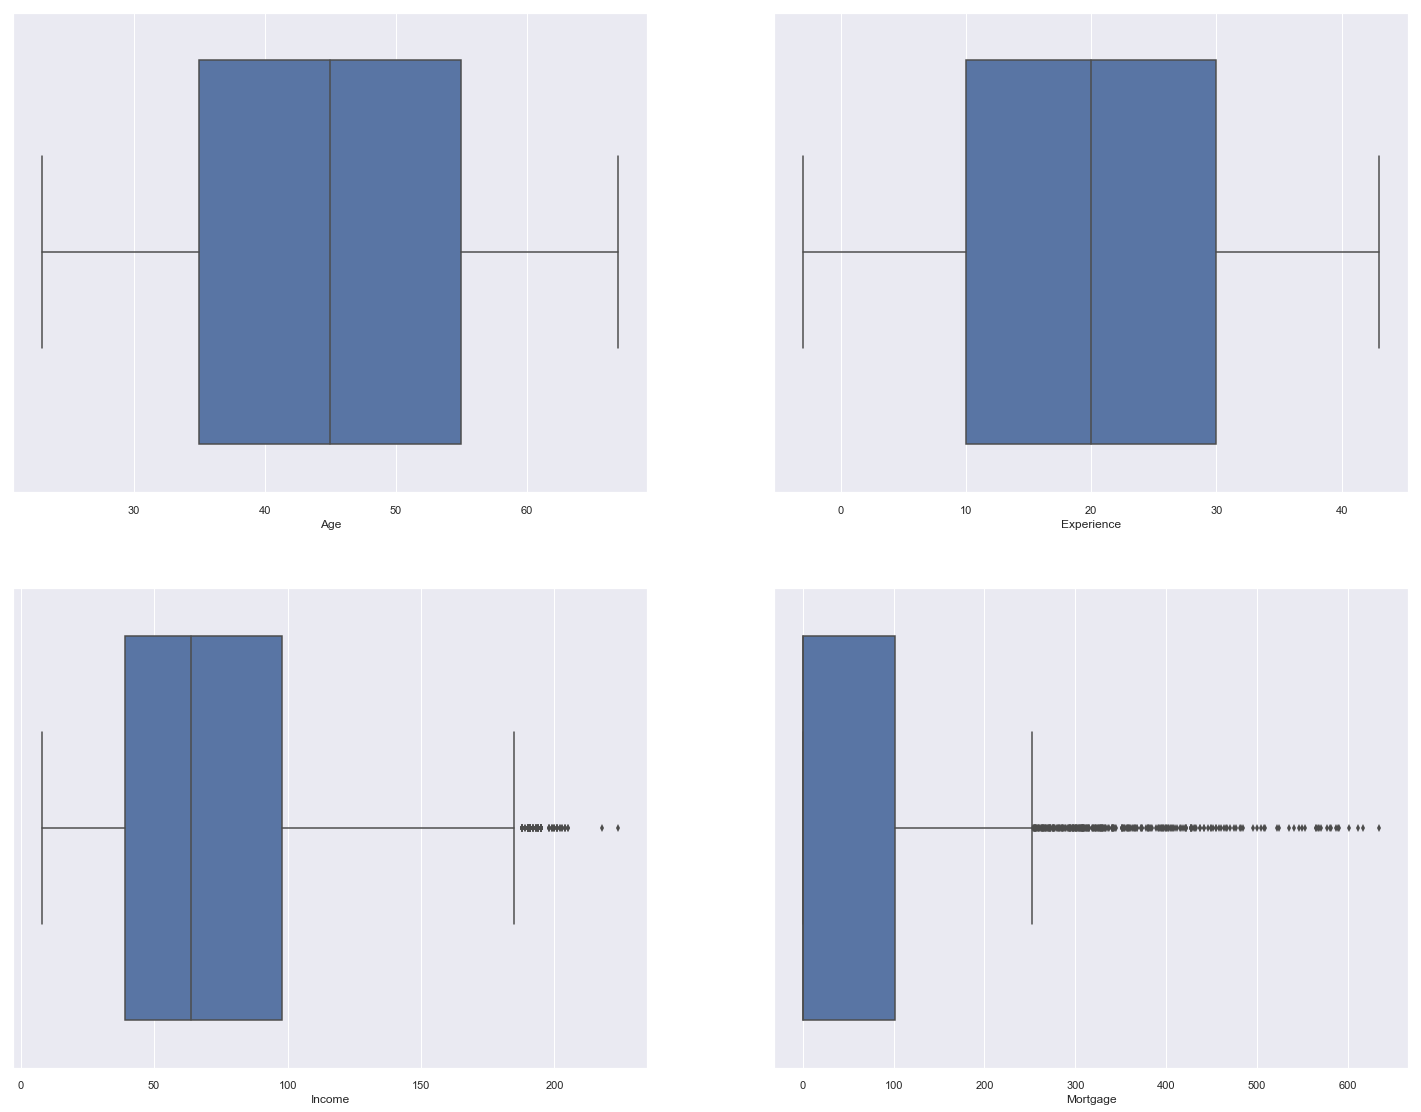

In [395]:
arr = ['Age','Experience','Income','Mortgage']
plt.figure(figsize = (25,30))
pos = 1
for i in arr:
    plt.subplot(3,2,pos)
    sns.boxplot(data[i])
    pos +=1

In [396]:
arr = ['Income','Mortgage']

for i in arr:
    q1, q2, q3 = data[i].quantile([0.25, 0.5, 0.75])
    IQR = q3 - q1
    lower_cap = q1 - 1.5*IQR
    upper_cap = q3 + 1.5*IQR
    data[i] = data[i].apply(lambda x: upper_cap if x>(upper_cap) else (lower_cap if x<(lower_cap) else x))

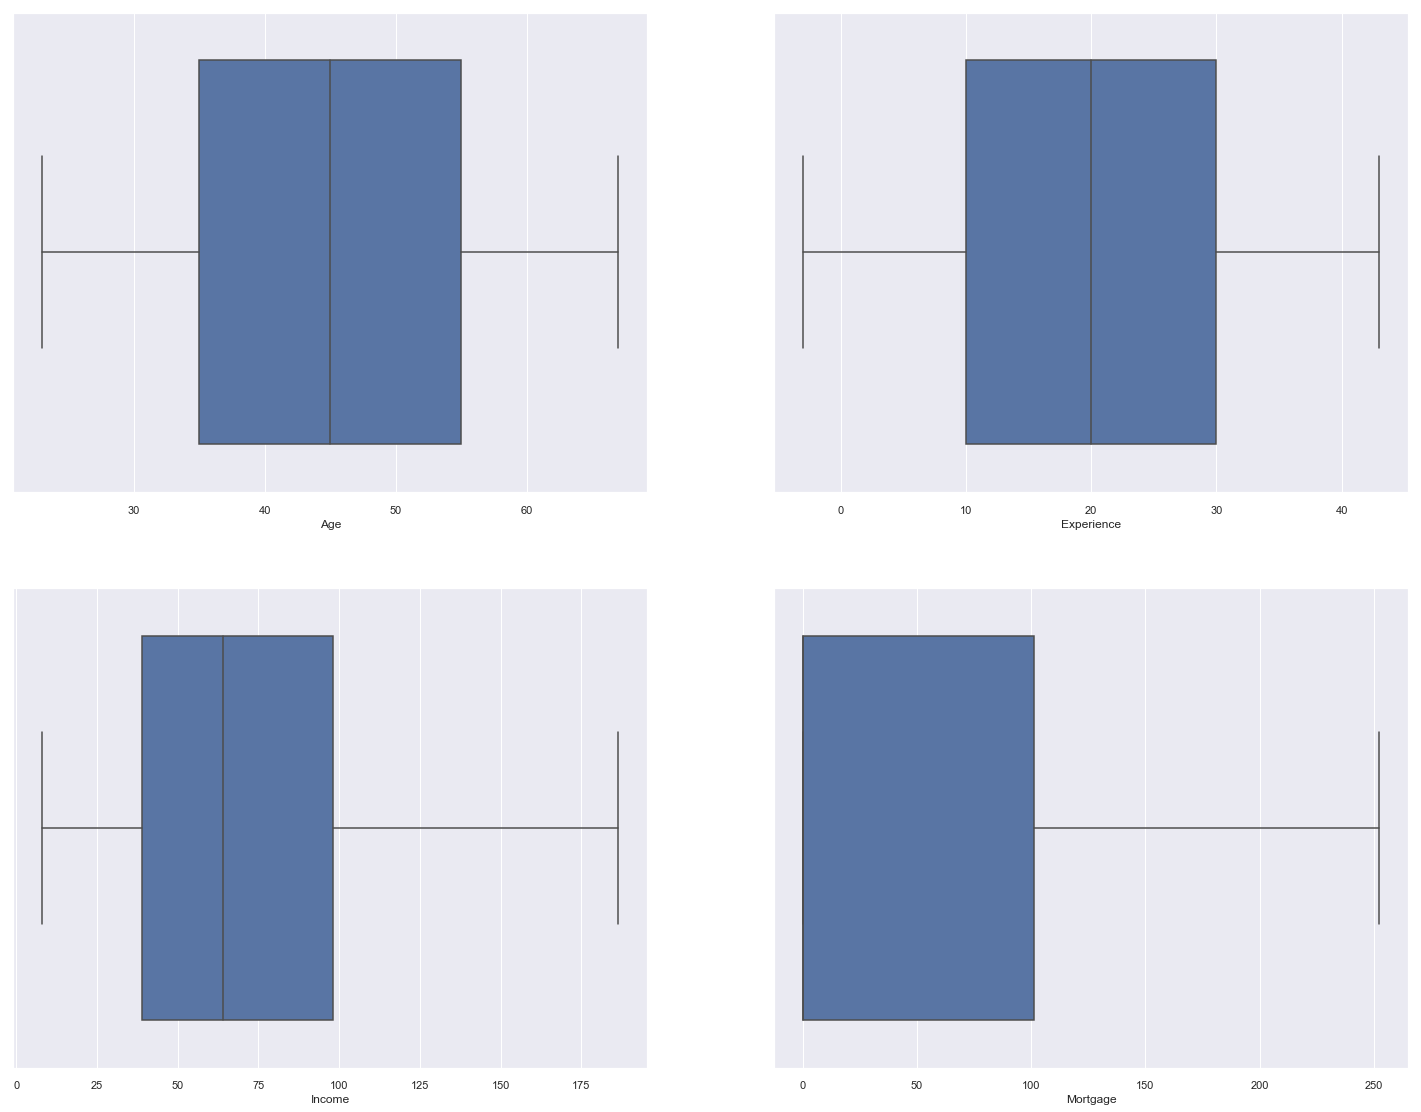

In [397]:
# capping the outliers
arr = ['Age','Experience','Income','Mortgage']
plt.figure(figsize = (25,30))
pos = 1
for i in arr:
    plt.subplot(3,2,pos)
    sns.boxplot(data[i])
    pos +=1

### Bivariate plots

In [398]:
d2 = data.drop(data.columns[[0,4,5,7,10,11,12,13]], axis = 1)
d2.head()

,Age,Experience,Income,CCAvg,Mortgage,Personal Loan
0,25,1,49.0,1.6,0.0,0
1,45,19,34.0,1.5,0.0,0
2,39,15,11.0,1.0,0.0,0
3,35,9,100.0,2.7,0.0,0
4,35,8,45.0,1.0,0.0,0


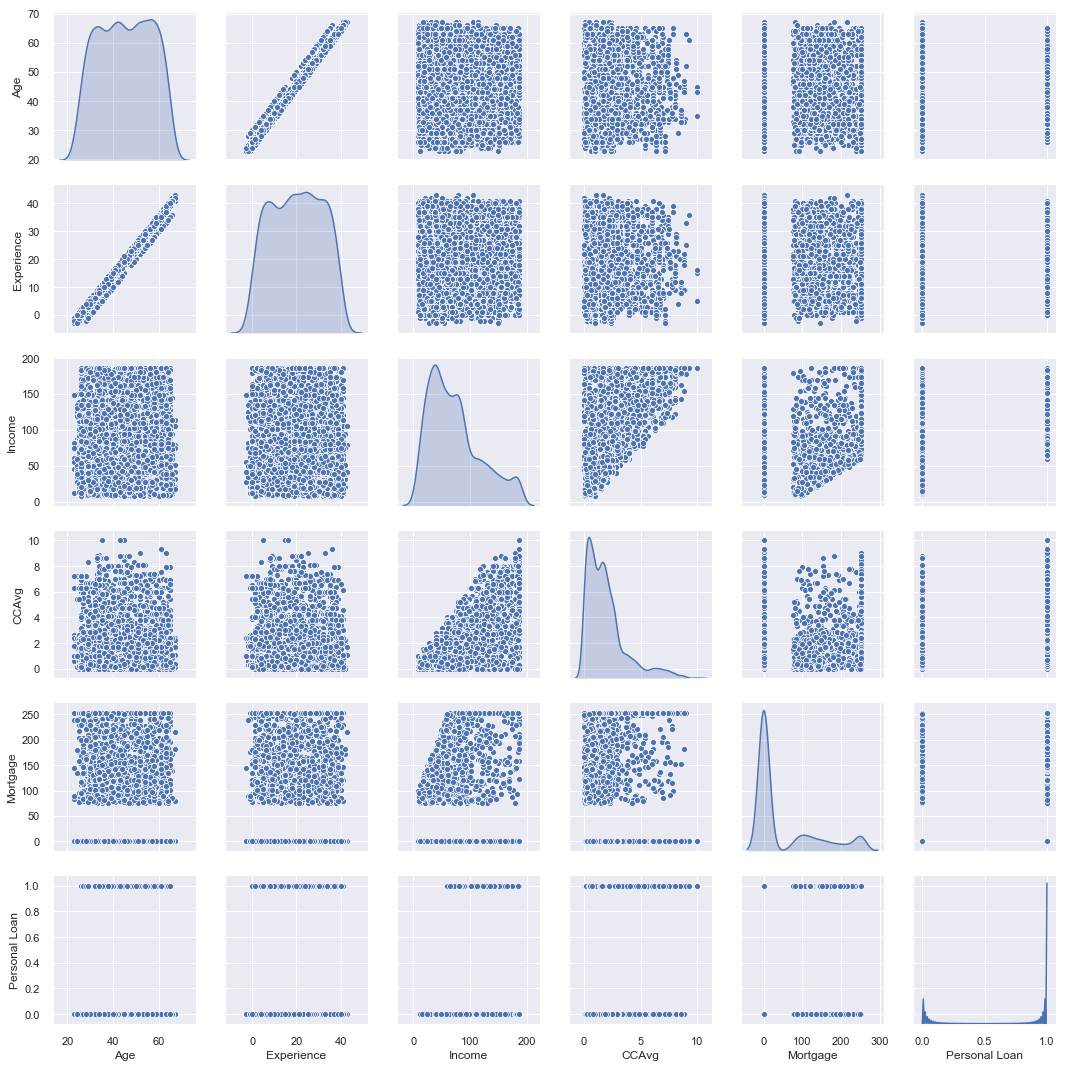

In [399]:
sns.pairplot(d2, diag_kind='kde')
plt.show()

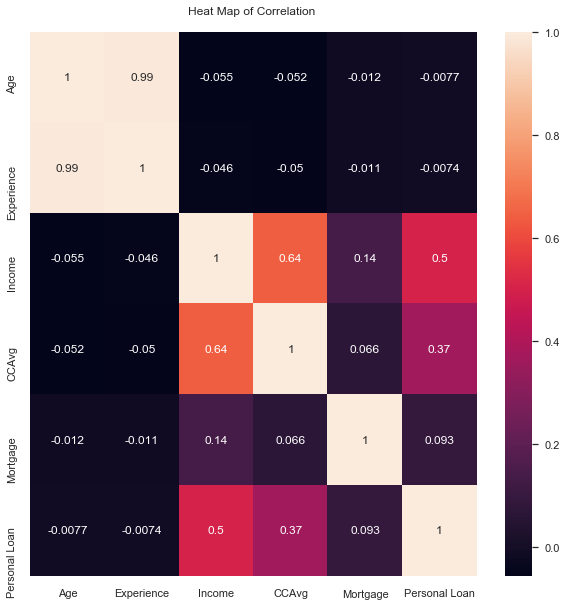

In [400]:
fig, ax = plt.subplots()
fig.set_size_inches(10,10)

plt.title('Heat Map of Correlation \n')
cor = d2.corr()
sns.heatmap(cor,annot = True)

plt.show()

### Notes:
#### 1. Age and Experience has a direct positive correlation.
#### 2. People who have accepted for personal loans had income above 50k.
#### 3. Amount of mortgage has a very weak influence on the acceptance for the personal loans.
#### 4. Average monthly credit spendings has a weak positive correlation on acceptance of personal loans.

### In Logistic Regression - we do not remove the highly correlated attributes.

### Getting model ready

In [401]:
d2.groupby(['Personal Loan']).mean()

,Age,Experience,Income,CCAvg,Mortgage
Personal Loan,,,,,
0,45.367257,20.132301,66.116150,1.729009,47.979646
1,45.066667,19.843750,144.254167,3.905354,74.178125


In [402]:
#Convert X & Y variable to a categorical variable as relevant
d2['Personal Loan'] = d2['Personal Loan'].astype('category')
d2[''] = d2['CCAvg'].astype('category')

In [403]:
#Calculate baseline proportion - ratio of Yes to No to identify data imbalance
prop_Y = d2['Personal Loan'].value_counts(normalize=True)
print(prop_Y)

0    0.904
1    0.096
Name: Personal Loan, dtype: float64


In [404]:
## Define X and Y variables
X = d2.drop('Personal Loan', axis=1)
Y = d2[['Personal Loan']]

In [405]:
#Convert categorical vriables to dummy variables
X = pd.get_dummies(X, drop_first=True)

## 3. Splitting the data into training and test set in the ratio of 70:30

In [406]:
##Split into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=1)

In [407]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [408]:
y_predict = logreg.predict(X_test)

In [409]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

### All the metrics related for evaluating the model performance

Trainig accuracy 0.9308571428571428

Testing accuracy 0.912

Confusion Matrix


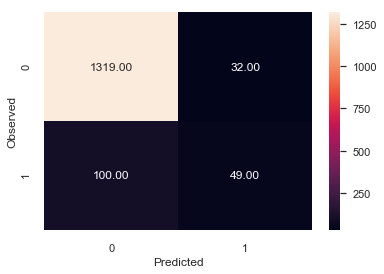

None

Recall: 0.3288590604026846

Precision: 0.6049382716049383

F1 Score: 0.42608695652173917

Roc Auc Score: 0.6525864510007503


In [410]:
print("Trainig accuracy",logreg.score(X_train,y_train))  
print()
print("Testing accuracy",logreg.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

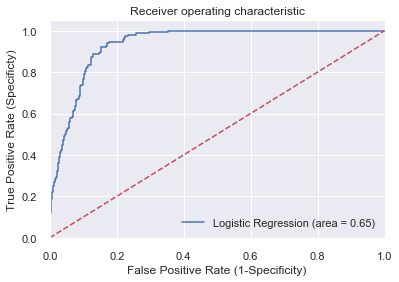

In [411]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Specificty)')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Verification of the paramters of logistic regression

In [412]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [413]:
# Running a loop to check different values of 'solver'

train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l2', C = 0.75,solver=i)  
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.932, 0.929, 0.928, 0.905, 0.906]

[0.917, 0.909, 0.909, 0.897, 0.896]


### Maximum score observed for newton-cg and liblinear

In [414]:
model = LogisticRegression(random_state=42,penalty='l2',solver='newton-cg') # changing class weight to balanced

model.fit(X_train, y_train) 

y_predict = model.predict(X_test)     

print("Trainig accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))

Trainig accuracy 0.9345714285714286

Testing accuracy 0.9186666666666666


In [415]:
model = LogisticRegression(random_state=42,penalty='l2',solver='newton-cg',class_weight='balanced') # changing class weight to balanced

model.fit(X_train, y_train) 

y_predict = model.predict(X_test)     

print("Trainig accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))

Trainig accuracy 0.8817142857142857

Testing accuracy 0.8713333333333333


### Including the balanced weight class reduces the accuracy - thus not the best possible model.

In [416]:
# Running a loop to check different values of 'C'

train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    model = LogisticRegression(random_state=42,penalty='l2', solver='newton-cg', C=i)  # changing values of C
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train,y_train),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(X_test, y_test),3))   # appending testing accuracy in a blank list for every run of the loop
    
print(C)
print()
print(train_score)
print()
print(test_score)

[0.01, 0.1, 0.25, 0.5, 0.75, 1]

[0.911, 0.914, 0.919, 0.927, 0.932, 0.935]

[0.907, 0.909, 0.911, 0.917, 0.917, 0.919]


### With newton-cg solver, the accuracy for the train and the test scores were the highest among other solvers.

Trainig accuracy 0.9265714285714286

Testing accuracy 0.9173333333333333

Confusion Matrix


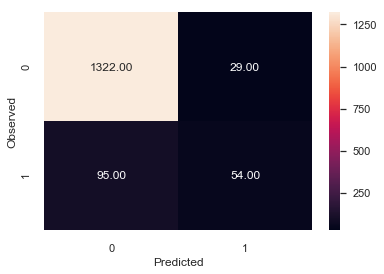

None

Recall: 0.3624161073825503

Precision: 0.6506024096385542

F1 Score: 0.4655172413793103

Roc Auc Score: 0.6704752631657385


In [417]:
#Therefore final model is
model = LogisticRegression(random_state=42,penalty='l2', solver='newton-cg',C=0.5) 
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print("Trainig accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

### Business understanding

**Confusion matrix means**

*True Positive (observed=1,predicted=1):*

Predicted that personal loan will be accepted by the customer.

*False Positive (observed=0,predicted=1):*

Predicted that personal loan will granted is not accepted by the customer.

*True Negative (observed=0,predicted=0):*

Predicted that personal loan is not available and the customer is not willing to take the loans as well.

*False Negative (observed=1,predicted=0):*

Predicted that personal loan will available is not granted to the eligible customer.

Here the bank wants to give loan to the people who are eligible for the personal loan i.e. less number of False Positive, if FP is high bank would lose money. So that the bank doesn't lose money on the people who are not eligible for the loan. Hence Precision is the important metric.